# Sentiment Classification for a Neural Network


## Why We're here

Natural Language Processing is the study of human language using tools such as Machine Learning, or in this case Deep Learning. In this notebook, the Sentiment Classification Neural Network will take in human generated text as inputs and output the text with positive or negative label. Hence, the goal of the Neural Network is to discover the correlation between the input and output data. To find this correlation, we are required to curate our dataset for text inputs and label pairs, transform our textual input data into numerical form, increase signal and reduce noise in data set, increase efficiency in our neural network, train the neural network, and make accurate prediction. The functions below display sample output of this project. 

<img src="output_images/synonyms_output.png" width="500" align = "left"/> 

<img src="output_images/sentiment_output.png" width="700" align = "left"/>

### Project Outline:

The project consists of 6 separate parts as shown as below: 

__Part 1__:
- [Curate a Dataset](#part_1)
- [Develop a "Predictive Theory"](#part_2)
- [Quick Theory Validation](#part_3)

__Part 2__:
- [Transform Text to Numbers](#part_4)
- [Create the Input/Output Data](#part_5)

__Part 3__:
- [Build a Neural Network](#part_6)

__Part 4__:
- [Understanding Neural Noise](#part_7)
- [Reduce Neural Noise for faster learning](#part_8)

__Part 5__:
- [Analyze Inefficiencies in our Network](#part_9)
- [Make our Network Train and Run Faster](#part_10)

__Part 6__:
- [Neural Network Full Training](#part_11)
- [A Synonyms Dictionary app](#part_12)
- [A Sentiment Classification app](#part_13)

# Part 1: Curate a Dataset<a id='part_1'></a>
The code cell below will read movie reviews from `reviews.txt` and store them as list in `reviews`. The data in `reviews.txt` has already been preprocessed and contains only lower case characters so that the same word, like `Excellent`, `excellent`, and `EXCELLENT`, are treated the same way. Subsequently, we open and read positive or negative label from `labels.txt` and store them as `labels`.

In [1]:
def print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] +"...")

# read reviews
g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

# reviews label("positive" or "negative")
g = open('labels.txt','r') 
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
len(labels)

25000

In [4]:
reviews[20]

'when i first read armistead maupins story i was taken in by the human drama displayed by gabriel no one and those he cares about and loves . that being said  we have now been given the film version of an excellent story and are expected to see past the gloss of hollywood . . .  br    br   writer armistead maupin and director patrick stettner have truly succeeded   br    br   with just the right amount of restraint robin williams captures the fragile essence of gabriel and lets us see his struggle with issues of trust both in his personnel life  jess  and the world around him  donna  .  br    br   as we are introduced to the players in this drama we are reminded that nothing is ever as it seems and that the smallest event can change our lives irrevocably . the request to review a book written by a young man turns into a life changing event that helps gabriel find the strength within himself to carry on and move forward .  br    br   it  s to bad that most people will avoid this film . 

In [5]:
labels[20]

'POSITIVE'

# Develop a Predictive Theory<a id='part_2'></a>

In [6]:
print("labels.txt \t : \t reviews.txt\n")
print_review_and_label(800)
print_review_and_label(3777)
print_review_and_label(6000)
print_review_and_label(11011)
print_review_and_label(15556)
print_review_and_label(18000)
print_review_and_label(200)
print_review_and_label(3427)
print_review_and_label(8900)
print_review_and_label(12351)
print_review_and_label(22456)
print_review_and_label(24221)


labels.txt 	 : 	 reviews.txt

POSITIVE	:	this is a docudrama story on the lindy chamberlain case and a look at it  s impa...
NEGATIVE	:	i can  t believe that those praising this movie herein aren  t thinking of some ...
POSITIVE	:	excellent political thriller  played much quieter and slower than other  higher ...
NEGATIVE	:	i like chris rock  but i feel he is wasted in this film . the idea of remaking h...
POSITIVE	:	what can i say about this movie  i have seen it quite a few times since the firs...
POSITIVE	:	de palma  s technique had hit its high maturity by the time of this film  which ...
POSITIVE	:	i was prepared for a turgid talky soap opera cum travelogue  but was pleased to ...
NEGATIVE	:	an unpleasant woman and an equally unpleasant man are violently and horribly ass...
POSITIVE	:	i picked this film up based on the plot summary and critics  quotes on the back ...
NEGATIVE	:	i found the dvd version of this movie at a rummage sale . the basic premise is a...
POSITIVE	:	director 

# Quick Theory Validation<a id='part_3'></a>

We know that in a movie review, each review is original and it represents the feeling or thought from a person, which is very unlikely duplicated. So if we train our neural network on the entire review, this will result in good correlation but poor in generalization. This leads to our theory of looking at how individual words might have correlation with these 'Positive' and 'Negative' labels. Use [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) library for individual words counting. 

In [7]:
from collections import Counter
import numpy as np

Below code cell is three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words. For each word in a positive review, increase the count for that word in both the positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both the negative counter and the total words counter.

In [8]:
# Create three Counter objects to store positive, negative and total counts
    
poslist = []
neglist = []
wholelist = []

for words, y in zip(reviews, labels):
    
    # use `split(' ')` to divide a piece of text into individual words
    words = words.split(' ')
    for eachword in words:
     
        if y == 'POSITIVE':
            poslist.append(eachword)
            wholelist.append(eachword)
            
        elif y =='NEGATIVE':
            neglist.append(eachword)
            wholelist.append(eachword)
            
        elif y != 'POSITIVE' and y!= 'NEGATIVE':
            wholelist.append(eachword)


positive_counts = Counter(poslist)
negative_counts = Counter(neglist)

# words that appear in both "Positive" and "Negative" labels are recorded only once in total_counts
total_counts = Counter(wholelist)


print("Total words:", len(total_counts))
print("total positive words", len(positive_counts))
print("total negative words", len(negative_counts))

Total words: 74074
total positive words 55214
total negative words 53635


Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [9]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

**Evaluation:** From the above results, we face an issue that common words like "and" appear very often in both positive and negative reviews. This leads us to calculate the **ratios** of word usage between positive and negative reviews, so that we can discover words found in positive reviews more often than in negative reviews, and vice versa.


In [11]:
pos_neg_ratios = positive_counts

for word1 in positive_counts:
    if word1 in negative_counts: 
        # calculate the ratio of positive to negative uses and store that ratio in `pos_neg_ratios`
        ratio= positive_counts[word1]/negative_counts[word1]
        pos_neg_ratios[word1] = ratio
        
    elif word1 not in negative_counts:
        pos_neg_ratios[word1] = positive_counts[word1]
        

Examine the ratios you've calculated for a few words:

In [12]:
print("Positive-to-negative ratio for 'and' = {}".format(pos_neg_ratios["and"]))
print("Positive-to-negative ratio for 'excellent' = {}".format(pos_neg_ratios["excellent"]))
print("Positive-to-negative ratio for 'horrible' = {}".format(pos_neg_ratios["horrible"]))

Positive-to-negative ratio for 'and' = 1.2061840424816832
Positive-to-negative ratio for 'excellent' = 4.337628865979381
Positive-to-negative ratio for 'horrible' = 0.14818355640535372


**Evaluation:**

* Words that you would expect to see more often in positive reviews – like "excellent" – have a high positive-to-negative ratio.
* Words that you would expect to see more often in negative reviews – like "horrible" – have a close to zero positive-to-negative ratio.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "and" – have values very close to 1. 

* The ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative ratios of very postive words is larger than the absolute value of the ratios for the very negative words. For example, a very positive word has a value 4, while a very negative value has a value close to zero. So there is no way to directly compare the two numbers to measure the magnitude of one positive sentiment word versus another negative sentiment word. 

* To fix this issue, we'll convert all of our ratios to new values using logarithms. 

* The code cell below will convert all ratios to logarithms. (i.e. use `np.log(ratio)`). This results in extremely positive and extremely negative words to have similar magnitudes in positive-to-negative ratios but opposite signs.

In [13]:

for pnword in pos_neg_ratios: 
    number=pos_neg_ratios[pnword]
    pos_neg_ratios[pnword] = np.log(number)
        

Examine the new ratios for the same words from before:

In [334]:
print("Positive-to-negative ratio for 'and' = {}".format(pos_neg_ratios["and"]))
print("Positive-to-negative ratio for 'excellent' = {}".format(pos_neg_ratios["excellent"]))
print("Positive-to-negative ratio for 'horrible' = {}".format(pos_neg_ratios["horrible"]))

Positive-to-negative ratio for 'and' = 0.18746169236813243
Positive-to-negative ratio for 'excellent' = 1.4673278545675326
Positive-to-negative ratio for 'horrible' = -1.9093035277056216


__Evaluation:__

From above results, the neutral words have values close to zero. In this case, "and" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But if we look at "excellent"'s ratio - it's value is approxiately `1.5`, showing a strong positive sentiment, while "horrible" has a value `-1.9`, showing a strong negative sentiment  similar score. It's now clear that both of these words are associated with specific, opposing sentiments.

Below code cell will show the ratios for the most common words, both 'Positive' and 'Negative' labels . 


In [20]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('paulie', 4.770684624465665),
 ('edie', 4.6913478822291435),
 ('antwone', 4.477336814478207),
 ('din', 4.406719247264253),
 ('gunga', 4.189654742026425),
 ('goldsworthy', 4.174387269895637),
 ('gypo', 4.0943445622221),
 ('yokai', 4.0943445622221),
 ('iturbi', 3.970291913552122),
 ('visconti', 3.9318256327243257),
 ('flavia', 3.9318256327243257),
 ('blandings', 3.871201010907891),
 ('giovanna', 3.871201010907891),
 ('kells', 3.871201010907891),
 ('feinstone', 3.871201010907891),
 ('brashear', 3.8501476017100584),
 ('gundam', 3.828641396489095),
 ('gino', 3.828641396489095),
 ('luzhin', 3.8066624897703196),
 ('deathtrap', 3.8066624897703196),
 ('philo', 3.7612001156935624),
 ('lindy', 3.7376696182833684),
 ('harilal', 3.713572066704308),
 ('panahi', 3.713572066704308),
 ('ossessione', 3.6635616461296463),
 ('clutter', 3.6635616461296463),
 ('tsui', 3.6375861597263857),
 ('caruso', 3.6375861597263857),
 ('anchors', 3.6375861597263857),
 ('sabu', 3.6109179126442243),
 ('ahmad', 3.6109179

In [21]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))


[('boll', -4.962844630259907),
 ('uwe', -4.61512051684126),
 ('thunderbirds', -4.110873864173311),
 ('beowulf', -4.0943445622221),
 ('dahmer', -3.970291913552122),
 ('wayans', -3.912023005428146),
 ('ajay', -3.8501476017100584),
 ('grendel', -3.8501476017100584),
 ('seagal', -3.6375861597263857),
 ('awfulness', -3.6375861597263857),
 ('steaming', -3.6109179126442243),
 ('welch', -3.58351893845611),
 ('deathstalker', -3.5263605246161616),
 ('sabretooth', -3.4011973816621555),
 ('interminable', -3.4011973816621555),
 ('forwarding', -3.367295829986474),
 ('devgan', -3.332204510175204),
 ('gamera', -3.3141860046725258),
 ('varma', -3.258096538021482),
 ('picker', -3.258096538021482),
 ('razzie', -3.258096538021482),
 ('dreck', -3.258096538021482),
 ('unwatchable', -3.248434627109745),
 ('stinker', -3.1986731175506815),
 ('nada', -3.1780538303479458),
 ('kirkland', -3.1354942159291497),
 ('nostril', -3.1354942159291497),
 ('giamatti', -3.1354942159291497),
 ('aag', -3.0910424533583156),
 ('


# Part 2: Transform Text into Numbers<a id='part_4'></a>

The next step is to transform the text into numbers so that when we present the words as input into the neural network, the neural network then search for correlation to make the correct positive or negative prediction of the output. We count the word and input those counts as inputs to the neural network, then we represent positive prediction as value 1 and negative prediction as value 0.  


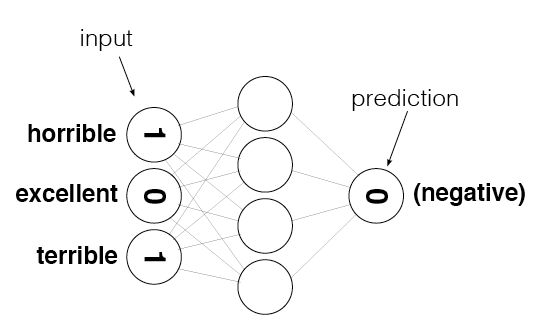

In [22]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

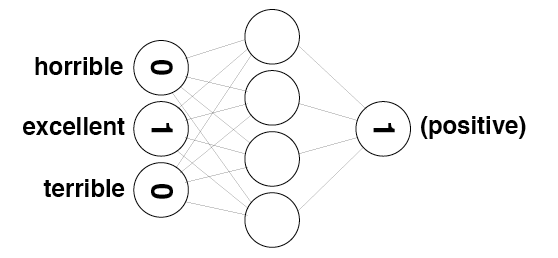

In [23]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Create the Input/Output Data<a id='part_5'></a>

Below code cell will create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets), named `vocab` that contains every word in the vocabulary.

In [26]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


Below image represents the layers of the neural network used throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

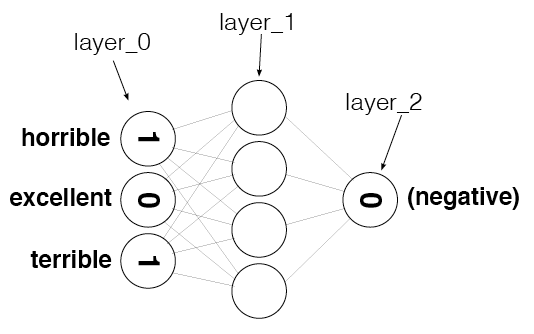

In [27]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

We create a 2-dimensional matrix with 1 row and `vocab_size` columns, and then initialize `layer_0` array to zeros as shown as below: 

In [28]:
layer_0 = np.zeros((1,vocab_size))
layer_0.shape

(1, 74074)

Now that `layer_0` contains one entry for every word in the vocabulary, we then create a lookup table that stores the index of every word.

In [29]:
# create a dictionary of words in the vocabulary mapped to index positions
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to index positions
word2index

{'': 0,
 'tome': 1,
 'cos': 2,
 'trashiness': 3,
 'matte': 4,
 'wirsching': 5,
 'baftas': 6,
 'tress': 7,
 'dancey': 8,
 'torturers': 9,
 'soul': 10,
 'exhausted': 11,
 'bank': 12,
 'atheist': 13,
 'mate': 14,
 'lin': 15,
 'flirty': 16,
 'watcxh': 17,
 'rohauer': 18,
 'calito': 19,
 'joel': 20,
 'captivated': 21,
 'roslin': 22,
 'ludicrousness': 23,
 'youssou': 24,
 'judo': 25,
 'expediency': 26,
 'imprisonment': 27,
 'professionally': 28,
 'heavyarms': 29,
 'crewed': 30,
 'yakitate': 31,
 'montorsi': 32,
 'part': 33,
 'flourescent': 34,
 'reddish': 35,
 'excrements': 36,
 'what': 37,
 'shoates': 38,
 'hayseeds': 39,
 'flesheaters': 40,
 'cylon': 41,
 'burakov': 42,
 'zenda': 43,
 'lipper': 44,
 'beserk': 45,
 'lasars': 46,
 'prettily': 47,
 'shahan': 48,
 'swampy': 49,
 'resigning': 50,
 'eggar': 51,
 'successful': 52,
 'sword': 53,
 'varied': 54,
 'tbere': 55,
 'mrio': 56,
 'revolt': 57,
 'cracker': 58,
 'satiricon': 59,
 'newt': 60,
 'selections': 61,
 'screamingly': 62,
 'simulatin

Below `update_input_layer` function will count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [30]:
def update_input_layer(review):

    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    
    # count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
           

The `get_target_for_labels` function below will return `1` and `0`, for the given label `Positive` and `Negative` respectively.

In [31]:
def get_target_for_label(label):
    
    if label == "POSITIVE":
        return 1 
    elif label == "NEGATIVE":
        return 0 

# Part 3: Build a Neural Network<a id='part_6'></a>

Below is a neural network framework named `SentimentNetwork` class. The neural network consists of an input layer, a hidden layer, and an output layer. We did not use activation function when calculating the hidden layer outputs because this is a binary classification linear problem, instead of a non-linear problem.  

In [37]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        # Assign a seed to ensure we get reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that before training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # split reviews into individual words
        for review in reviews: 
            for word in review.split(" "): 
                review_vocab.add(word)
    
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels: 
            label_vocab.add(label)
        
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, rword in enumerate(self.review_vocab):
            self.word2index[rword] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, vlabel in enumerate(self.label_vocab):
            self.label2index[vlabel] = i
      
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate
        
        # initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        # the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        
        # create the input layer, a two-dimensional matrix with shape 
        # 1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
    
        # count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(" "):
            if (word in self.word2index.keys()):     
                self.layer_0[0][self.word2index[word]] += 1
        
                
    def get_target_for_label(self,label):
        
        if (label == "POSITIVE"):
            return 1 
        elif (label == "NEGATIVE"):
            return 0
        
    def sigmoid(self,x):
        
        # return sigmoid activation function output 
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        
        # return the derivative of the sigmoid activation function,        
        return output*(1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # begin timing for time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # get the next review and its correct label
            review = training_reviews[i]
            label = self.get_target_for_label(training_labels[i])
            
            # input layer
            self.update_input_layer(review)
            
            # hidden layer
            # no activation for hidden layer, so no sigmoid here
            hidden_output = np.dot(self.layer_0, self.weights_0_1)
            
            # output layer
            output = self.sigmoid(np.dot(hidden_output, self.weights_1_2))
            
            # output error
            error = label-output
            output_error_term = error*output*(1-output)
            
            # backpropagated error
            hidden_error_term =np.dot(output_error_term, self.weights_1_2.T)#*hidden_output*(1-hidden_output)# Do not\ 
                                                                    # use activation function for the hidden layer
            # update the weights
            self.weights_1_2 += np.dot(hidden_output.T, output_error_term)*self.learning_rate
            self.weights_0_1 += np.dot(self.layer_0.T, hidden_error_term )*self.learning_rate
            
            # check for prediction accuracy    
            if (output>=0.5 and label==1): 
                correct_so_far += 1
            elif (output<0.5 and label==0):
                correct_so_far += 1
            
            # stop timing for time statistics
            elapsed_time = float(time.time() - start)
            
            # check average review per second 
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0) and (i != 0 ) :
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        # keep track of how many correct predictions we make
        correct = 0

        # begin timing for time statistics 
        start = time.time()

        # loop through each of the given reviews and call run to predict its label
        # if prediction is correct, then add one to correct. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1 
            
            # stop timing for time statistics 
            elapsed_time = float(time.time() - start)
            
            # check for the speed by calculating reviews per second 
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # input layer
        self.update_input_layer(review.lower())
            
        # hidden layer
        hidden_output = np.dot(self.layer_0, self.weights_0_1)
            
        # output layer
        output = self.sigmoid(np.dot(hidden_output, self.weights_1_2))
            
        if (output[0] >= 0.5):
            return "POSITIVE"
        elif (output[0] <0.5):
            return "NEGATIVE"
        

The following code cell will create a `SentimentNetwork` that will train on all except the last 1000 reviews, as the last 1000 reviews are for testing. We use a learning rate of `0.1`.

In [38]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:10.4% Speed(reviews/sec):155.9 #Correct:1383 #Trained:2501 Training Accuracy:55.2%
Progress:20.8% Speed(reviews/sec):155.9 #Correct:2960 #Trained:5001 Training Accuracy:59.1%
Progress:31.2% Speed(reviews/sec):149.2 #Correct:4626 #Trained:7501 Training Accuracy:61.6%
Progress:41.6% Speed(reviews/sec):145.7 #Correct:6366 #Trained:10001 Training Accuracy:63.6%
Progress:52.0% Speed(reviews/sec):143.7 #Correct:8140 #Trained:12501 Training Accuracy:65.1%
Progress:62.5% Speed(reviews/sec):142.6 #Correct:9922 #Trained:15001 Training Accuracy:66.1%
Progress:72.9% Speed(reviews/sec):141.2 #Correct:11694 #Trained:17501 Training Accuracy:66.8%
Progress:83.3% Speed(reviews/sec):140.8 #Correct:13550 #Trained:20001 Training Accuracy:67.7%
Progress:93.7% Speed(reviews/sec):140.5 #Correct:15391 #Trained:22501 Training Accuracy:68.4%
Progress:99.9% Speed(reviews/sec):140.3 #Correct:16540 #Trained:24000 Training Accuracy:68.9%

The following code cell will test the network's performance against the last 1000 reviews.

In [39]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:80.4% Speed(reviews/sec):569.2 #Correct:599 #Tested:805 Testing Accuracy:74.4%Progress:99.9% Speed(reviews/sec):551.8 #Correct:741 #Tested:1000 Testing Accuracy:74.1%

__Evaluation:__
From the results above, the network has progressively improved during training. The training accuracy reaches about 69% while the testing accuracy is 74%. This network's performance is still not very good, in part 4, we will improve the training accuracy by reducing noise in our input data. 

# Part 4: Understanding Neural Noise<a id='part_7'></a>

We want our neural network to train on signal, rather than noise. If we recall the `update_input_layer` function in our neural network, the input `self.layer_0` contains each word and its total counts, so how high this total counts number affects how dominantly its weights to all hidden layer nodes. For example if we run `review_counter.most_common()` to look at words that have most weights in the first review. It's unfortunate to see that `period/.` , `the`, `to` , and `i` words that have nothing to do with sentiment, have dominant effect in the hidden layer. These words are noise in the neural network and by counting each word seems to highlight the noise, rather than signal, making it harder for the neural network to find the signal for accurate prediction. To eliminate the noise, we could change the `update_input_layer`'s incrementing sign to equal to 1. For example from `self.layer_0[0][self.word2index[word]] += 1` to `self.layer_0[0][self.word2index[word]] = 1`.    

In [43]:
def update_input_layer(self,review):
        
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
    
        # count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(" "):
            if (word in self.word2index.keys()):     
                self.layer_0[0][self.word2index[word]] += 1

In [44]:
review_counter = Counter()
for word in reviews[0].split(" "):
    review_counter[word] += 1
    
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

# Reducing Noise in Our Input Data<a id='part_8'></a>

In [45]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
      
        # Assign a seed to ensure we get reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that before training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # split reviews into individual words
        for review in reviews: 
            for word in review.split(" "): 
                review_vocab.add(word)
    
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels: 
            label_vocab.add(label)
        
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, rword in enumerate(self.review_vocab):
            self.word2index[rword] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, vlabel in enumerate(self.label_vocab):
            self.label2index[vlabel] = i
      
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate
        
        # initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        # the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        
        # create the input layer, a two-dimensional matrix with shape 
        # 1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
    
        # count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(" "):
            if (word in self.word2index.keys()):     
                self.layer_0[0][self.word2index[word]] = 1
        
                
    def get_target_for_label(self,label):
        
        if (label == "POSITIVE"):
            return 1 
        elif (label == "NEGATIVE"):
            return 0
        
    def sigmoid(self,x):
        
        # return sigmoid activation function output 
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        
        # return the derivative of the sigmoid activation function,        
        return output*(1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # begin timing for time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # get the next review and its correct label
            review = training_reviews[i]
            label = self.get_target_for_label(training_labels[i])
            
            # input layer
            self.update_input_layer(review)
            
            # hidden layer
            # no activation for hidden layer, so no sigmoid here
            hidden_output = np.dot(self.layer_0, self.weights_0_1)
            
            # output layer
            output = self.sigmoid(np.dot(hidden_output, self.weights_1_2))
            
            # output error
            error = label-output
            output_error_term = error*output*(1-output)
            
            # backpropagated error
            hidden_error_term =np.dot(output_error_term, self.weights_1_2.T)#*hidden_output*(1-hidden_output)# Do not\ 
                                                                    # use activation function for the hidden layer
            # update the weights
            self.weights_1_2 += np.dot(hidden_output.T, output_error_term)*self.learning_rate
            self.weights_0_1 += np.dot(self.layer_0.T, hidden_error_term )*self.learning_rate
            
            # check for prediction accuracy    
            if (output>=0.5 and label==1): 
                correct_so_far += 1
            elif (output<0.5 and label==0):
                correct_so_far += 1
            
            # stop timing for time statistics
            elapsed_time = float(time.time() - start)
            
            # check average review per second 
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0) and (i != 0 ) :
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        # keep track of how many correct predictions we make
        correct = 0

        # begin timing for time statistics 
        start = time.time()

        # loop through each of the given reviews and call run to predict its label
        # if prediction is correct, then add one to correct. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1 
            
            # stop timing for time statistics 
            elapsed_time = float(time.time() - start)
            
            # check for the speed by calculating reviews per second 
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # input layer
        self.update_input_layer(review.lower())
            
        # hidden layer
        hidden_output = np.dot(self.layer_0, self.weights_0_1)
            
        # output layer
        output = self.sigmoid(np.dot(hidden_output, self.weights_1_2))
            
        if (output[0] >= 0.5):
            return "POSITIVE"
        elif (output[0] <0.5):
            return "NEGATIVE"

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:10.4% Speed(reviews/sec):156.3 #Correct:1944 #Trained:2501 Training Accuracy:77.7%
Progress:20.8% Speed(reviews/sec):157.8 #Correct:4003 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):156.5 #Correct:6119 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):158.0 #Correct:8273 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):156.8 #Correct:10433 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):153.4 #Correct:12554 #Trained:15001 Training Accuracy:83.6%
Progress:72.9% Speed(reviews/sec):151.8 #Correct:14678 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):152.0 #Correct:16869 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):152.3 #Correct:19050 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):152.3 #Correct:20374 #Trained:24000 Training Accuracy:84.8%

In [47]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):551.1 #Correct:855 #Tested:1000 Testing Accuracy:85.5%

__Evaluation:__
After we eliminated the noise by getting rid of the total counts weighting, the neural network was able to find correlation so much faster with approximately 78% training accuracy just after 10% progress. Both the training accuracy and testing accuracy eventually reach up to 85%. This is a great improvement in the neural network's performance, simply done by increasing a signal and reducing the noise on the input data. Now, we are happy with our accuracy, in the next part, we will discuss how to improve the speed(reviews/sec).  

# Part 5: Analyze Inefficiencies in our Network<a id='part_9'></a>
Neural Network can train endlessly in any cases. However, the faster you get neural network to train, the more data you can put into it, hence, the stronger it can be. Notice from the image below, we are creating a huge vector on `layer_0` with zeros and ones. These zero vectors aren't doing anything and are wasteful computationally, so the idea is we find the indices with ones in `layer_0` , and use those indices in our `weights_0_1` , adding the weights to the `layer_1`, instead of performing the usual dot product between `layer_0` and weights for `layer_1`. We will see a simple example below.   

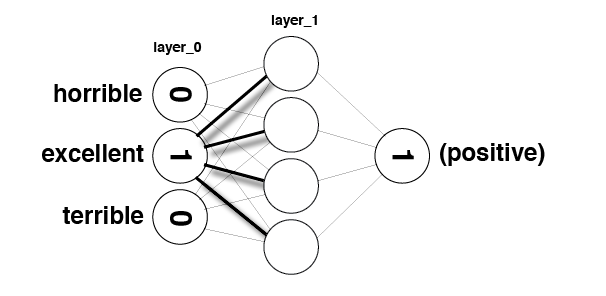

In [41]:
Image(filename='sentiment_network_sparse.png')

In [62]:
layer_0 = np.zeros(10)
layer_1 = np.zeros(5)
# layer_0 indices with value one
layer_0[3] = 1
layer_0[8] = 1
layer_0

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [64]:
weights_0_1 = np.random.randn(10,5)
weights_0_1

array([[-0.51709446, -0.99702683,  0.24879916, -0.29664115,  0.49521132],
       [-0.17470316,  0.98633519,  0.2135339 ,  2.19069973, -1.89636092],
       [-0.64691669,  0.90148689,  2.52832571, -0.24863478,  0.04366899],
       [-0.22631424,  1.33145711, -0.28730786,  0.68006984, -0.3198016 ],
       [-1.27255876,  0.31354772,  0.50318481,  1.29322588, -0.11044703],
       [-0.61736206,  0.5627611 ,  0.24073709,  0.28066508, -0.0731127 ],
       [ 1.16033857,  0.36949272,  1.90465871,  1.1110567 ,  0.6590498 ],
       [-1.62743834,  0.60231928,  0.4202822 ,  0.81095167,  1.04444209],
       [-0.40087819,  0.82400562, -0.56230543,  1.95487808, -1.33195167],
       [-1.76068856, -1.65072127, -0.89055558, -1.1191154 ,  1.9560789 ]])

If we perform the usual dot product of `layer_0` with `weights_0_1`, we are essentially multiplying all vectors of `layer_0`, including zeros and ones with the weights, to get the below output for `layer_1`:  

In [88]:
import time 
# start timing
start = time.time()

layer_1 =layer_0.dot(weights_0_1)
print("output:", layer_1)

# stop timing
elapsed_time = float(time.time() - start)
print("Elapsed time", elapsed_time)

output: [-0.62719243  2.15546273 -0.84961329  2.63494791 -1.65175327]
Elapsed time 0.0009200572967529297


However, if we specify the indices that contain only ones and perform the corresponding weights addition to output `layer_1`, we are able to get the same results but at faster speed, as shown in the elapsed time. 

In [89]:
layer_1 = np.zeros(5)
layer_1
layer_0_indices_with_ones = [3,8]

# start timing
start = time.time()

for index in layer_0_indices_with_ones:
    layer_1 += (1 * weights_0_1[index])
print("output:", layer_1)

# stop timing
elapsed_time = float(time.time() - start)
print("Elapsed time", elapsed_time)

output: [-0.62719243  2.15546273 -0.84961329  2.63494791 -1.65175327]
Elapsed time 0.0005788803100585938


# Make our Network More Efficient<a id='part_10'></a>
In the following code cell, we will make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, the following changes are made:
* Remove the `update_input_layer` function
* Modify `init_network`:
>* replace `self.layer_0` with `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw` for ptrprocess your reviews.
>* preprocess the reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. The code will create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [285]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        # Assign a seed to ensure we get reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that before training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # split reviews into individual words
        for review in reviews: 
            for word in review.split(" "): 
                review_vocab.add(word)
    
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels: 
            label_vocab.add(label)
        
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, rword in enumerate(self.review_vocab):
            self.word2index[rword] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, vlabel in enumerate(self.label_vocab):
            self.label2index[vlabel] = i
      
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate
        
        # initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        # the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1  = np.zeros((1,hidden_nodes))
    
        
    def update_input_layer(self,review):
        
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
    
        # count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(" "):
            if (word in self.word2index.keys()):     
                self.layer_0[0][self.word2index[word]] = 1
        
                
    def get_target_for_label(self,label):
        
        if (label == "POSITIVE"):
            return 1 
        elif (label == "NEGATIVE"):
            return 0
        
    def sigmoid(self,x):
        
        # return sigmoid activation function output 
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        
        # return the derivative of the sigmoid activation function,        
        return output*(1-output)

    def train(self, training_reviews_raw, training_labels):
        
        #epochs = 10 
        #for i in range(epochs):
            #print("-------------------------epoch {}-----------------------------".format(i+1))
            # pre-process training reviews so we can deal directly with the indices of value one inputs
            training_reviews = []
            for review in training_reviews_raw:
                indices = set()
                for word in review.split(" "):
                    if(word in self.word2index.keys()):
                        indices.add(self.word2index[word])
                training_reviews.append(list(indices))
        
            # make sure out we have a matching number of reviews and labels
            assert(len(training_reviews) == len(training_labels))
        
            # keep track of correct predictions to display accuracy during training 
            correct_so_far = 0
        
            # begin timing for time statistics
            start = time.time()

            # loop through all the given reviews and run a forward and backward pass,
            # updating weights for every item
            for i in range(len(training_reviews)):
            
                # get the next review and its correct label
                review = training_reviews[i]
                label = self.get_target_for_label(training_labels[i])
            
                # hidden layer
                # add only the indices corresponding weights, which are non-zero items 
                self.layer_1 *= 0 
                for index in review:
                    self.layer_1 += self.weights_0_1[index]
            
            # hidden layer
            # no activation for hidden layer, so no sigmoid here
            #hidden_output = np.dot(self.layer_1, self.weights_0_1)
            
            
            
                # output layer
                output = self.sigmoid(np.dot(self.layer_1, self.weights_1_2))
            
                # output error
                error = label-output
                output_error_term = error*output*(1-output)
            
                # backpropagated error
                hidden_error_term =np.dot(output_error_term, self.weights_1_2.T)#*hidden_output*(1-hidden_output)# Do not\ 
                                                                    # use activation function for the hidden layer
                # update the weights
                self.weights_1_2 += np.dot(self.layer_1.T, output_error_term)*self.learning_rate
            
                for index in review:
                    self.weights_0_1[index] += hidden_error_term[0]*self.learning_rate
            
                # check for prediction accuracy    
                if (output>=0.5 and label==1): 
                    correct_so_far += 1
                elif (output<0.5 and label==0):
                    correct_so_far += 1
            
                # stop timing for time statistics
                elapsed_time = float(time.time() - start)
            
                # check average review per second 
                reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
                sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                                 + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                                 + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                                 + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
                if(i % 2500 == 0) and (i != 0 ) :
                    print("")
    
    def test(self, testing_reviews, testing_labels):
        
        # keep track of how many correct predictions we make
        correct = 0

        # begin timing for time statistics 
        start = time.time()

        # loop through each of the given reviews and call run to predict its label
        # if prediction is correct, then add one to correct. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1 
            
            # stop timing for time statistics 
            elapsed_time = float(time.time() - start)
            
            # check for the speed by calculating reviews per second 
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # input layer
        #self.update_input_layer(review.lower())
            
        # hidden layer
        # add just the indices corresponding weights to layer_1
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
            
        # output layer
        output = self.sigmoid(np.dot(self.layer_1, self.weights_1_2))
            
        if (output[0] >= 0.5):
            return "POSITIVE"
        elif (output[0] <0.5):
            return "NEGATIVE"

Run the following cell to recreate the network and train it once again.

In [286]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:2.69% Speed(reviews/sec):1020. #Correct:455 #Trained:647 Training Accuracy:70.3%Progress:10.4% Speed(reviews/sec):721.9 #Correct:1944 #Trained:2501 Training Accuracy:77.7%
Progress:20.8% Speed(reviews/sec):840.1 #Correct:4003 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):894.2 #Correct:6119 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):934.9 #Correct:8273 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):955.8 #Correct:10433 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):962.5 #Correct:12554 #Trained:15001 Training Accuracy:83.6%
Progress:72.9% Speed(reviews/sec):952.9 #Correct:14678 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):960.5 #Correct:16869 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):969.0 #Correct:19050 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):973.3 #Correct:20374 #Trained:24000 Tr

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [97]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1408. #Correct:855 #Tested:1000 Testing Accuracy:85.5%

__Evaluation:__
From the network's training results above, after modification to adding only non-zero weights to hidden layer, the speed(reviews/sec) has improved to 973 reviews/sec, in comparison to 152 reviews/sec before the changes. This is more than 6 times improvement in speed. Similarly, in the testing results above, the speed is now 1408 reviews/second, which is way faster than 551 reviews/second previously.  

# Part 6: Neural Network Full Training<a id='part_11'></a>

In previous sections, we have reduced the noise in our input data for better prediction accuracy, and have also made our network more efficient through modifying weights to hidden layer. The neural network is now ready to run a full training for 10 epochs to further improve it's training and testing accuracy. The code cells below will show both the training and testing performance.    

In [291]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        
        # Assign a seed to ensure we get reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that before training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # split reviews into individual words
        for review in reviews: 
            for word in review.split(" "): 
                review_vocab.add(word)
    
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels: 
            label_vocab.add(label)
        
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, rword in enumerate(self.review_vocab):
            self.word2index[rword] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, vlabel in enumerate(self.label_vocab):
            self.label2index[vlabel] = i
      
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate
        
        # initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        # the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # initialize self.weights_1_2 as a matrix of random values. 
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1  = np.zeros((1,hidden_nodes))
    
        
    def update_input_layer(self,review):
        
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
    
        # count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(" "):
            if (word in self.word2index.keys()):     
                self.layer_0[0][self.word2index[word]] = 1
        
                
    def get_target_for_label(self,label):
        
        if (label == "POSITIVE"):
            return 1 
        elif (label == "NEGATIVE"):
            return 0
        
    def sigmoid(self,x):
        
        # return sigmoid activation function output 
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        
        # return the derivative of the sigmoid activation function,        
        return output*(1-output)

    def train(self, training_reviews_raw, training_labels):
        
        epochs = 10 
        for i in range(epochs):
            print("\n-------------------------epoch {}-----------------------------".format(i+1))
            # pre-process training reviews so we can deal directly with the indices of value one inputs
            training_reviews = []
            for review in training_reviews_raw:
                indices = set()
                for word in review.split(" "):
                    if(word in self.word2index.keys()):
                        indices.add(self.word2index[word])
                training_reviews.append(list(indices))
        
            # make sure out we have a matching number of reviews and labels
            assert(len(training_reviews) == len(training_labels))
        
            # keep track of correct predictions to display accuracy during training 
            correct_so_far = 0
        
            # begin timing for time statistics
            start = time.time()

            # loop through all the given reviews and run a forward and backward pass,
            # updating weights for every item
            for i in range(len(training_reviews)):
            
                # get the next review and its correct label
                review = training_reviews[i]
                label = self.get_target_for_label(training_labels[i])
            
                # hidden layer
                # add only the indices corresponding weights, which are non-zero items 
                self.layer_1 *= 0 
                for index in review:
                    self.layer_1 += self.weights_0_1[index]
            
            # hidden layer
            # no activation for hidden layer, so no sigmoid here
            #hidden_output = np.dot(self.layer_1, self.weights_0_1)
            
            
            
                # output layer
                output = self.sigmoid(np.dot(self.layer_1, self.weights_1_2))
            
                # output error
                error = label-output
                output_error_term = error*output*(1-output)
            
                # backpropagated error
                hidden_error_term =np.dot(output_error_term, self.weights_1_2.T)#*hidden_output*(1-hidden_output)# Do not\ 
                                                                    # use activation function for the hidden layer
                # update the weights
                self.weights_1_2 += np.dot(self.layer_1.T, output_error_term)*self.learning_rate
            
                for index in review:
                    self.weights_0_1[index] += hidden_error_term[0]*self.learning_rate
            
                # check for prediction accuracy    
                if (output>=0.5 and label==1): 
                    correct_so_far += 1
                elif (output<0.5 and label==0):
                    correct_so_far += 1
            
                # stop timing for time statistics
                elapsed_time = float(time.time() - start)
            
                # check average review per second 
                reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
                sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                                 + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                                 + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                                 + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
                if(i % 2500 == 0) and (i != 0 ) :
                    print("")
    
    def test(self, testing_reviews, testing_labels):
        
        # keep track of how many correct predictions we make
        correct = 0

        # begin timing for time statistics 
        start = time.time()

        # loop through each of the given reviews and call run to predict its label
        # if prediction is correct, then add one to correct. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1 
            
            # stop timing for time statistics 
            elapsed_time = float(time.time() - start)
            
            # check for the speed by calculating reviews per second 
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # input layer
        #self.update_input_layer(review.lower())
            
        # hidden layer
        # add just the indices corresponding weights to layer_1
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
            
        # output layer
        output = self.sigmoid(np.dot(self.layer_1, self.weights_1_2))
            
        if (output[0] >= 0.5):
            return "POSITIVE"
        elif (output[0] <0.5):
            return "NEGATIVE"

In [292]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])


-------------------------epoch 1-----------------------------
Progress:10.4% Speed(reviews/sec):1053. #Correct:1944 #Trained:2501 Training Accuracy:77.7%
Progress:20.8% Speed(reviews/sec):1040. #Correct:4003 #Trained:5001 Training Accuracy:80.0%
Progress:31.2% Speed(reviews/sec):1029. #Correct:6119 #Trained:7501 Training Accuracy:81.5%
Progress:41.6% Speed(reviews/sec):1012. #Correct:8273 #Trained:10001 Training Accuracy:82.7%
Progress:52.0% Speed(reviews/sec):988.2 #Correct:10433 #Trained:12501 Training Accuracy:83.4%
Progress:62.5% Speed(reviews/sec):992.4 #Correct:12554 #Trained:15001 Training Accuracy:83.6%
Progress:72.9% Speed(reviews/sec):993.8 #Correct:14678 #Trained:17501 Training Accuracy:83.8%
Progress:83.3% Speed(reviews/sec):879.8 #Correct:16869 #Trained:20001 Training Accuracy:84.3%
Progress:93.7% Speed(reviews/sec):880.0 #Correct:19050 #Trained:22501 Training Accuracy:84.6%
Progress:99.9% Speed(reviews/sec):887.6 #Correct:20374 #Trained:24000 Training Accuracy:84.8%
----

In [293]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1556. #Correct:850 #Tested:1000 Testing Accuracy:85.0%

# A Synonyms Dictionary app<a id='part_12'></a>

We have successfully trained our neural network with movie review words to create high value for positive sentiment or low value for negative sentiment. Neural network backpropagate the gradients and update the input weights to be more accurate, for example the positive sentiment output is giving more weights to positive words because they are in the same phenomenon, and eventually similar words (good, excellent, awesome) with the same signal will end up congregating together with very similar vector to one another. Computationally, If we dot product of two similar words, we will get a high value, however if we dot product of two opposite words, this will result in a low value. The `most_similar_words` function below will take any word input and output 50 most similar words correspond to your input.

__Further improvement:__ 
    This synonyms dictionary app is only limited to words often found in movie reviews, and the neural network is trained to congregate positive words or negative words. This app may be improved by including more variety of input data that have more classification classes, for example training on neural network classification for different sports (football, basketball, volleyball), so that we could relate words correspond to each sports. If the neural network is built large enough, it will be a strong synonyms dictionary app to give you all related key words, given an input.

In [321]:
def most_similar_words(focus = "horrible"):
    most_similar = Counter()
    
    for word in mlp.word2index.keys():
        most_similar[word] = np.dot(mlp.weights_0_1[mlp.word2index[word]],mlp.weights_0_1[mlp.word2index[focus]])
    
    syno = most_similar.most_common()
    syno = list(dict(syno[0:50]).keys())

    print("The top 50 similar words for '{}' are shown below: ".format(focus.upper()))
    for i, word in enumerate(syno): 
        print("{}. {}".format(i+1, word))


In [322]:
most_similar_words("love")

The top 50 similar words for 'LOVE' are shown below: 
1. refreshing
2. excellent
3. wonderfully
4. rare
5. perfect
6. appreciated
7. incredible
8. wonderful
9. highly
10. superb
11. surprisingly
12. hooked
13. amazing
14. today
15. funniest
16. noir
17. enjoyable
18. perfectly
19. outstanding
20. tears
21. eerie
22. steals
23. captures
24. surprised
25. underrated
26. quiet
27. dirty
28. liked
29. focuses
30. tight
31. friendship
32. atmosphere
33. definitely
34. gem
35. marie
36. loved
37. sent
38. portraying
39. great
40. innocent
41. finest
42. powerful
43. crafted
44. favorite
45. scariest
46. touching
47. treat
48. referred
49. greene
50. definite


In [330]:
most_similar_words("horrible")

The top 50 similar words for 'HORRIBLE' are shown below: 
1. worst
2. disappointment
3. waste
4. awful
5. poorly
6. disappointing
7. mess
8. terrible
9. lacks
10. fails
11. laughable
12. forgettable
13. dull
14. boring
15. unfunny
16. worse
17. pointless
18. lousy
19. badly
20. redeeming
21. insult
22. mediocre
23. avoid
24. pathetic
25. dreadful
26. save
27. mildly
28. skip
29. poor
30. horrible
31. disappointed
32. uninteresting
33. ugly
34. unless
35. alright
36. basically
37. ludicrous
38. wooden
39. trite
40. ridiculous
41. mst
42. obnoxious
43. generous
44. stinks
45. miscast
46. stupidity
47. annoying
48. weak
49. effort
50. lack


# A Sentiment Classification app<a id='part_13'></a>

The `my_review_sentiment` function below will take in any sentence input, and output a positive or negative sentiment to the sentence. Computationally, the sentence is split into individual words and run on trained neural network for sentiment output.  

__Further Improvement:__
This Sentiment Classification app is trained on movie reviews vocabularies for positive or negative sentiment. We could improve this app by including more sentiment types, for example a neutral, mild positive, and a mild negative sentiment. This app is not limited to movie reviews sentiment, we could further expand our input data and classification to other industry, for instance training neural network sentiment classification for investment decision (Bullish or Bearish), we could relate words correspond to bullish or bearish signal and make quick investment decision, analyzing 10-k/annual reports filed by publicly traded companies.  

In [242]:
def my_review_sentiment(focus = "I really enjoy this movie, the story was amazing"):
    sentiment = mlp.run(focus)
    
    print("The sentiment for '{}' is {}! ".format(focus.upper(), sentiment.lower()))

In [243]:
my_review_sentiment("I hate the movie, the main character dies")

The sentiment for 'I HATE THE MOVIE, THE MAIN CHARACTER DIES' is negative! 


In [244]:
my_review_sentiment("I laugh everytime I watch the movie")

The sentiment for 'I LAUGH EVERYTIME I WATCH THE MOVIE' is positive! 
